# 2 Denoising

In [45]:
import numpy as np 
import cv2
import matplotlib.pyplot as plt 
import math
import skimage as skimg

#### 1. Filter the noisy image using a 5 × 5 Gaussian filter with variance equal to 2

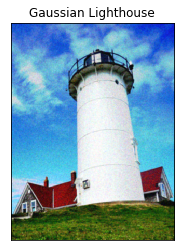

In [46]:
image_path = "./lighthouse.png"  # load image 
img = cv2.imread(image_path) 
# convert image from BGR to RGB 
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) 

# show normal lighthouse image 
# plt.subplot(131), plt.imshow(img), plt.title('Lighthouse')
# plt.xticks([]), plt.yticks([])

# read gaussian lighthouse image 
image_path_gaussian = "./gaussian_lighthouse.png" 
img_gaussian = cv2.imread(image_path_gaussian) 

# filter image using 5x5 gaussian with variance = 2
img_gaussian = cv2.GaussianBlur(img_gaussian, (5,5), math.sqrt(2))

# Conversion
img_gaussian = cv2.cvtColor(img_gaussian, cv2.COLOR_BGR2RGB)

# show gaussian lighthouse image after gaussian filter 
plt.imshow(img_gaussian)
plt.title("Gaussian Lighthouse")
plt.xticks([]), plt.yticks([])

plt.show() 

#### 2. Filter the noisy image using a box filter of the same size

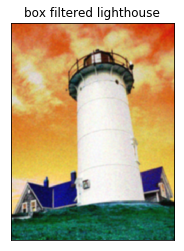

In [47]:
# create box filter 
boxFilter = np.ones((5,5), np.float32)/(5*5)

# filter image & do conversion
img_box_filter = cv2.filter2D(img_gaussian, -1, boxFilter)
img_box_filter = cv2.cvtColor(img_box_filter, cv2.COLOR_BGR2RGB)

plt.imshow(img_box_filter)
plt.title("box filtered lighthouse")
plt.xticks([]), plt.yticks([])
plt.show()


#### 3. Compare the PSNR of both of the denoised images to that of the clean image and state which method gives the superior result. (Use PSNR function provided by opencv)

PSNR is Peak Signal-to-Noise Ratio. It is the ratio between the max possible power of a signal and the power of corrupting nosise that affects the fidelity of its representation. 

In [48]:
psnr_gaussian = skimg.measure.compare_psnr(img, img_gaussian)
psnr_box_filter = skimg.measure.compare_psnr(img, img_box_filter)

print ("PSNR of Gaussian Filtered lighthouse: ", psnr_gaussian)
print ("PSNR of box filtered lighthouse:  ", psnr_box_filter)


PSNR of Gaussian Filtered lighthouse:  26.110604939673387
PSNR of box filtered lighthouse:   9.185721937827399


A higher PSNR indicates that the reconstruction is better. The previous results show that the Gaussian Filtering has a higher PSNR, and thus it gives a superior result. 

#### 4. Filter the noisy image （salt and pepper) using the same Gaussian filter as used in the previous question

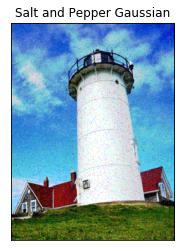

In [56]:
img_path_salt = "./saltandpepper_lighthouse.png"
img_salt = cv2.imread(img_path_salt) 
img_salt = cv2.cvtColor(img_salt, cv2.COLOR_BGR2RGB)

# Gaussian filter 
img_salt_gaussian = cv2.GaussianBlur(img_salt, (5,5), math.sqrt(2))

# convert color format 
# img_saltpepper_gaussian = cv2.cvtColor(img_salt_gaussian, cv2.COLOR_BGR2RGB)

plt.imshow(img_saltpepper_gaussian)
plt.title("Salt and Pepper Gaussian")
plt.xticks([]), plt.yticks([])
plt.show()


 #### 5. Filter the noisy image using a median filter of the same size.

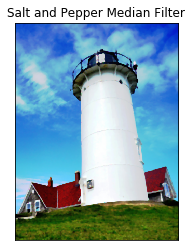

In [57]:
# Median filter 5x5

img_salt_median = cv2.medianBlur(img_salt, 5)
# img_saltpepper_median = cv2.cvtColor(img_salt_median, cv2.COLOR_BGR2RGB)

plt.imshow(img_saltpepper_median), plt.title("Salt and Pepper Median Filter")
plt.xticks([]), plt.yticks([])
plt.show()


#### 6. Compare the PSNR of both of the denoised images to that of the clean image and state which method gives a better result.

In [59]:
# TODO: Check PSNR result 

# img_salt = cv2.imread(img_path_salt) 
# img_salt = cv2.cvtColor(img_salt, cv2.COLOR_BGR2RGB)
psnr_salt_gaussian = skimg.measure.compare_psnr(img, img_saltpepper_gaussian)
psnr_salt_median = skimg.measure.compare_psnr(img, img_saltpepper_median)

print ("PSNR of Gaussian Filtered lighthouse: ", psnr_salt_gaussian)
print ("PSNR of Median Filtered lighthouse: ", psnr_salt_median)


PSNR of Gaussian Filtered lighthouse:  25.25788454316406
PSNR of Median Filtered lighthouse:  26.843612368248802


From the result, the PSNR of image using the median filter is higher, and thus the median filter gives a better result. 

# 3 Sobel Edge Detector

In [ ]:
import numpy as np 
import cv2
import matplotlib.pyplot as plt 
import math

#### 1. Apply a Sobel edge detector with the filter size of 3×3, 5×5 and 7×7 to the image. Threshold the filtered image to detect edges. Use two values of thresholds: 10% and 20% of the maximum pixel value in the filtered image. 

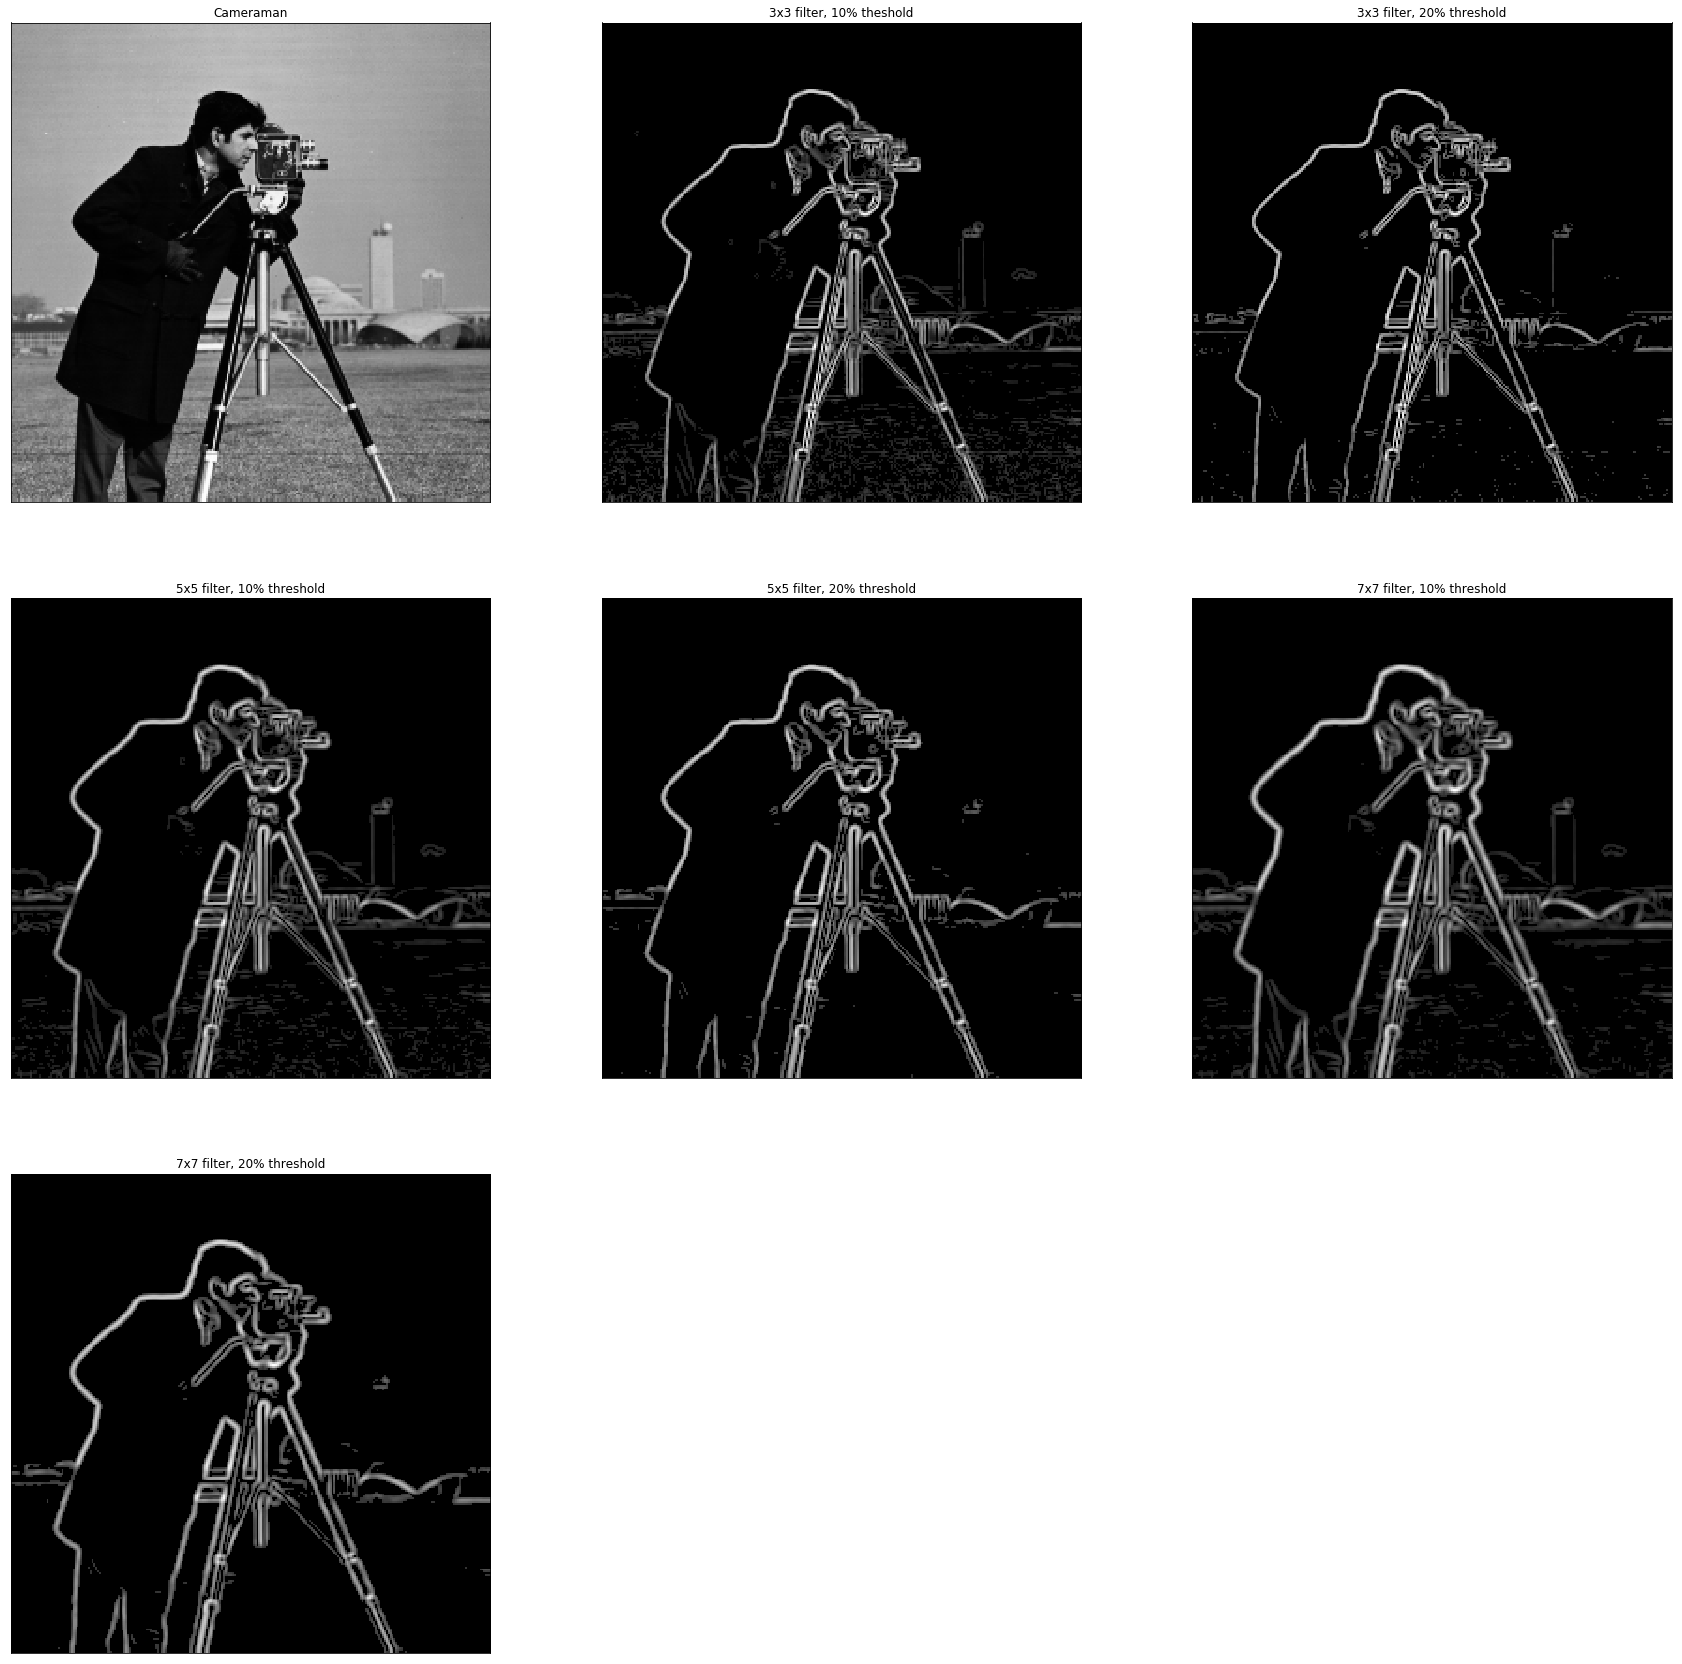

In [85]:
# load cameraman image 
img = cv2.imread("./cameraman.png")

# convert image to grayscale
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# sobel filter 3 x 3 for x and y 
sobelx = cv2.Sobel(img, cv2.CV_64F, 1, 0, ksize = 3) #kernel size = 3
sobely = cv2.Sobel(img, cv2.CV_64F, 0, 1, ksize = 3) 

# calculate magnitude 
sobel = cv2.magnitude(sobelx, sobely) 

# find max pixel value 
maxValue = np.max(sobel)

# apply threshold 10% and 20% of the max pixel value 
(ret, threshold10)= cv2.threshold(sobel, maxValue * 0.1, 255, cv2.THRESH_TOZERO)
(ret, threshold20)= cv2.threshold(sobel, maxValue * 0.2, 255, cv2.THRESH_TOZERO)
# cv2.THRESH_TOZERO can also change to cv2.THRESH_BINARY


# sobel filter 5x5 
sobelx_5 = cv2.Sobel(img, cv2.CV_64F, 1, 0, ksize = 5)
sobely_5 = cv2.Sobel(img, cv2.CV_64F, 0, 1, ksize = 5)
sobel_5 = cv2.magnitude(sobelx_5, sobely_5)
maxValue_5 = np.max(sobel_5)
(ret, threshold10_5) = cv2.threshold(sobel_5, maxValue_5 * 0.1, 255, cv2.THRESH_TOZERO)
(ret, threshold20_5) = cv2.threshold(sobel_5, maxValue_5 * 0.2, 255, cv2.THRESH_TOZERO)

# sobel filter 7x7
sobelx_7 = cv2.Sobel(img, cv2.CV_64F, 1, 0, ksize = 7)
sobely_7 = cv2.Sobel(img, cv2.CV_64F, 0, 1, ksize = 7)
sobel_7 = cv2.magnitude(sobelx_7, sobely_7)
maxValue_7 = np.max(sobel_7)
(ret, threshold10_7) = cv2.threshold(sobel_7, maxValue_7*0.1, 255, cv2.THRESH_TOZERO)
(ret, threshold20_7) = cv2.threshold(sobel_7, maxValue_7*0.2, 255, cv2.THRESH_TOZERO)


# display 3x3 filtered images 
plt.figure(figsize = (30, 30))
plt.subplot(331), plt.imshow(img, cmap = 'gray')
plt.title("Cameraman"), plt.xticks([]), plt.yticks([])
plt.subplot(332), plt.imshow(threshold10, cmap = 'gray')
plt.title("3x3 filter, 10% theshold"), plt.xticks([]), plt.yticks([])
plt.subplot(333), plt.imshow(threshold20, cmap = 'gray')
plt.title("3x3 filter, 20% threshold"), plt.xticks([]), plt.yticks([])

# display 5x5 filtered images
plt.subplot(334), plt.imshow(threshold10_5, cmap = "gray")
plt.title("5x5 filter, 10% threshold"), plt.xticks([]), plt.yticks([])
plt.subplot(335), plt.imshow(threshold20_5, cmap = "gray")
plt.title("5x5 filter, 20% threshold"), plt.xticks([]), plt.yticks([])

# display 7x7 filtered images
plt.subplot(336), plt.imshow(threshold10_7, cmap = "gray")
plt.title("7x7 filter, 10% threshold"), plt.xticks([]), plt.yticks([])
plt.subplot(337), plt.imshow(threshold20_7, cmap = "gray")
plt.title("7x7 filter, 20% threshold"), plt.xticks([]), plt.yticks([])
plt.show()



#### 2. Comment on the effect of filter size on the output

Based on the images output, we can see that the edges are thicker by using a larger filter size. This is because the bigger filter size takes account more pixels around the scene. It could overlook at the features and skip details in an image. A smaller filter size tends to provide more information, but it could also pick up more noise. 

#### 3. Apply a Sobel edge detector with the filter size of 3 × 3. Threshold the filtered image to detect edges. Use two values of thresholds: 10% and 20% of the maximum pixel value in the filtered image. 

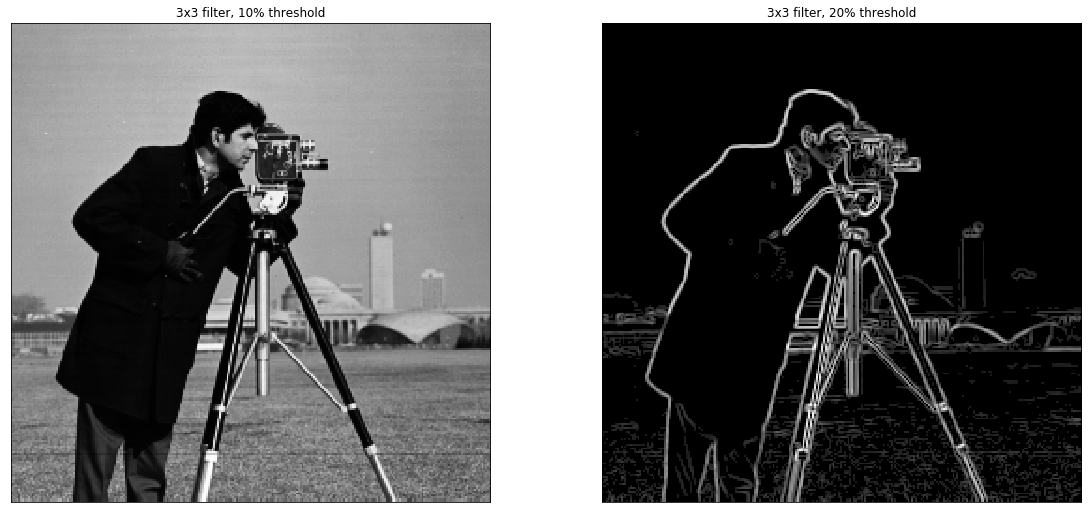

In [87]:
img_gaussian = cv2.imread("./gaussian_cameraman.png")

img_gaussian = cv2.cvtColor(img_gaussian, cv2.COLOR_BGR2GRAY)

# sobel filter 3 x 3
sobelx_gaussian = cv2.Sobel(img_gaussian, cv2.CV_64F, 1, 0, ksize = 3) #kernel size = 3
sobely_gaussian = cv2.Sobel(img_gaussian, cv2.CV_64F, 0, 1, ksize = 3) 

# calculate magnitude 
sobel_gaussian = cv2.magnitude(sobelx_gaussian, sobely_gaussian) 

# find max pixel value 
maxValue_gaussian = np.max(sobel_gaussian)

# apply threshold 10% and 20% of the max pixel value 
(ret, threshold10_gaussian)= cv2.threshold(sobel_gaussian, maxValue * 0.1, 255, cv2.THRESH_TOZERO)
(ret, threshold20_gaussian)= cv2.threshold(sobel_gaussian, maxValue * 0.2, 255, cv2.THRESH_TOZERO)

# display images
plt.figure(figsize = (30, 30))
plt.subplot(331), plt.imshow(img, cmap = 'gray')
plt.title("3x3 filter, 10% threshold"), plt.xticks([]), plt.yticks([])
plt.subplot(332), plt.imshow(threshold10, cmap = 'gray')
plt.title("3x3 filter, 20% threshold"), plt.xticks([]), plt.yticks([])
plt.show()
